### Random Forest Classifier

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
rndm_frst = RandomForestClassifier()

In [5]:
rndm_frst.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
new_obs = [[2, 3, 4, 1]]

In [7]:
rndm_frst.predict(new_obs)

array([1])

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Feature Importance

In [9]:
feat_import = rndm_frst.feature_importances_

In [10]:
feat_import

array([0.06342764, 0.01812472, 0.54643259, 0.37201505])

In [45]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
indicies = np.argsort(feat_import)[::-1]

In [12]:
indicies

array([2, 3, 0, 1])

In [13]:
names = [iris.feature_names[i] for i in indicies]

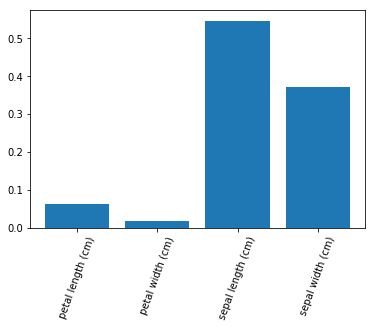

In [14]:
plt.figure()
plt.bar(range(len(feat_import)), feat_import)
plt.xticks(range(len(feat_import)), names, rotation = 70);

### Entropy Criteria

In [15]:
rndm_frst_entpy = RandomForestClassifier(criterion='entropy')

In [16]:
rndm_frst_entpy.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rndm_frst_entpy.predict(new_obs)

array([1])

### Regression Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
boston = datasets.load_boston()

In [20]:
features = boston.data[:, 0:2]
target = boston.target

In [21]:
reg_forest = RandomForestRegressor()

In [22]:
reg_forest.fit(features, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Feature Selection



In [23]:
from sklearn.feature_selection import SelectFromModel

In [24]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [25]:
random_frst = RandomForestClassifier()

In [26]:
selector = SelectFromModel(random_frst, threshold = 0.3)

In [27]:
feat_importance = selector.fit_transform(X,y)
#fit_transforms have been used in Tfidf and in Regression

In [28]:
feat_importance[:5]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [29]:
model = random_frst.fit(feat_importance, y)

In [30]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
model.score(feat_importance, y)

0.96

In [46]:
from sklearn.pipeline import make_pipeline

In [48]:
pipe = make_pipeline(SelectFromModel(random_frst, threshold = 0.3),
                    RandomForestClassifier())

In [49]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('selectfrommodel', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_s...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [50]:
model.score(feat_importance, y)

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 1 

### Imbalanced Class

In [32]:
X = iris.data[30:]
y = iris.target[30:]

In [33]:
X.shape

(120, 4)

In [34]:
y.shape

(120,)

In [35]:
balanced_forest = RandomForestClassifier(class_weight= "balanced")

In [36]:
model = balanced_forest.fit(X, y)

In [37]:
model.score(X, y)

1.0

### Boosting

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
X = iris.data
y = iris.target

In [40]:
ada_boost = AdaBoostClassifier()

In [41]:
model = ada_boost.fit(X, y)

### Out of Bag Error

In [42]:
rndm_frst = RandomForestClassifier(n_estimators=1000, oob_score=True)

In [43]:
model = rndm_frst.fit(X, y)

In [44]:
rndm_frst.oob_score_

0.9533333333333334